In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt, seaborn as sns

In [2]:
def get_scores(model, Xtest, ytest):
    y_pred = model.predict(Xtest)
    return (y_pred, 
            np.sqrt(mean_squared_error(ytest, y_pred)), 
            r2_score(ytest, y_pred),
            model.__class__.__name__)

In [3]:
def plot_comp(y_test, y_pred):
    plt.figure(figsize=(6,6))
    plt.plot(y_test*1000, y_pred_lr*1000, 'bo')
    plt.plot([-0, 5], [0, 5], color='black', linewidth=2.0, linestyle='-')
    plt.xlabel(r'Prediction ($10^{-3} cm^{-1}$)')
    plt.ylabel(r'Observation ($10^{-3} cm^{-1}$)')
    plt.show()

In [4]:
data = pd.read_excel('kappa.xlsx')
X = data.drop(data.columns[0:3], axis=1).drop(data.columns[-1], axis=1)
y = data[data.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [5]:
#models 
#simple linear regression
lr = LinearRegression().fit(X_train, y_train)
y_pred_lr, rmse_lr, r2_lr, lr_name = get_scores(lr, X_test, y_test)

#ridge regression
ridge = Ridge(random_state=0).fit(X_train, y_train)
y_pred_rg, rmse_rg, r2_rg, rg_name = get_scores(ridge, X_test, y_test)

#lasso regression
lasso = Lasso(alpha=0.00003,random_state=0).fit(X_train, y_train)
y_pred_ls, rmse_ls, r2_ls, ls_name = get_scores(lasso, X_test, y_test)

#elasticnet regression
en = ElasticNet(alpha=0.000059,random_state=0).fit(X_train, y_train)
y_pred_en, rmse_en, r2_en, en_name = get_scores(en, X_test, y_test)


print("{0} model\n RMSE = {1: .5f}, R2 = {2: .5f}\n".format(lr_name, rmse_lr, r2_lr))
print("{0} model\n RMSE = {1: .5f}, R2 = {2: .5f}\n".format(rg_name, rmse_rg, r2_rg))
print("{0} model\n RMSE = {1: .5f}, R2 = {2: .5f}\n".format(ls_name, rmse_ls, r2_ls))
print("{0} model\n RMSE = {1: .5f}, R2 = {2: .5f}\n".format(en_name, rmse_en, r2_en))


LinearRegression model
 RMSE =  0.00035, R2 =  0.85007

Ridge model
 RMSE =  0.00037, R2 =  0.83418

Lasso model
 RMSE =  0.00037, R2 =  0.83402

ElasticNet model
 RMSE =  0.00037, R2 =  0.83407



In [ ]:
# scaler = StandardScaler()
# X_train_std = scaler.fit_transform(X_train)
# X_test_std = scaler.fit_transform(X_test)

# #models 
# #simple linear regression
# lr = LinearRegression().fit(X_train_std, y_train)
# y_pred_lr, rmse_lr, r2_lr, lr_name = get_scores(lr, X_test_std, y_test)

# #ridge regression
# ridge = Ridge(random_state=0).fit(X_train_std, y_train)
# y_pred_rg, rmse_rg, r2_rg, rg_name = get_scores(ridge, X_test_std, y_test)

# #lasso regression
# lasso = Lasso(alpha=0.00003,random_state=0).fit(X_train_std, y_train)
# y_pred_ls, rmse_ls, r2_ls, ls_name = get_scores(lasso, X_test_std, y_test)

# #elasticnet regression
# en = ElasticNet(alpha=0.000059,random_state=0).fit(X_train_std, y_train)
# y_pred_en, rmse_en, r2_en, en_name = get_scores(en, X_test_std, y_test)


# print("{0} model\n RMSE = {1: .5f}, R2 = {2: .5f}\n".format(lr_name, rmse_lr, r2_lr))
# print("{0} model\n RMSE = {1: .5f}, R2 = {2: .5f}\n".format(rg_name, rmse_rg, r2_rg))
# print("{0} model\n RMSE = {1: .5f}, R2 = {2: .5f}\n".format(ls_name, rmse_ls, r2_ls))
# print("{0} model\n RMSE = {1: .5f}, R2 = {2: .5f}\n".format(en_name, rmse_en, r2_en))

In [6]:
def plot_coef(coeffs):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(X.columns)), coeffs)
    plt.axhline(0, color='r', linestyle='solid')
    plt.xticks(range(len(X.columns)), X.columns,rotation=50)
    plt.title("Coefficients for Multiple Linear Regression")
    plt.ylabel("coefficients")
    plt.xlabel("features")
    plt.show()

In [12]:
#coefficient analysis
#simple linear regression
lr_coeffs = lr.coef_
ridge_coeffs = ridge.coef_
lasso_coeffs = lasso.coef_



In [13]:
# Creating a dataframe containing coefficient estimates from three models
comparing_models = pd.DataFrame({'without_regularization': lr_coeffs,
                                 'Ridge': ridge_coeffs,
                                 'Lasso':  lasso_coeffs},
                                  index=X.columns)
comparing_models

,without_regularization,Ridge,Lasso
nelements,0.000058,0.000041,-0.000000e+00
nsites,-0.000005,-0.000007,0.000000e+00
nbranch,-0.000016,-0.000020,0.000000e+00
spacegroup,0.000002,0.000002,1.618144e-06
a (A),0.000445,0.000259,-0.000000e+00
b (A),-0.000493,-0.000337,-0.000000e+00
c (A),-0.000003,-0.000007,-0.000000e+00
alpha (°),0.000009,0.000010,2.019659e-05
beta (°),0.000009,0.000010,3.409776e-22
gama (°),-0.000005,-0.000005,-5.520907e-06


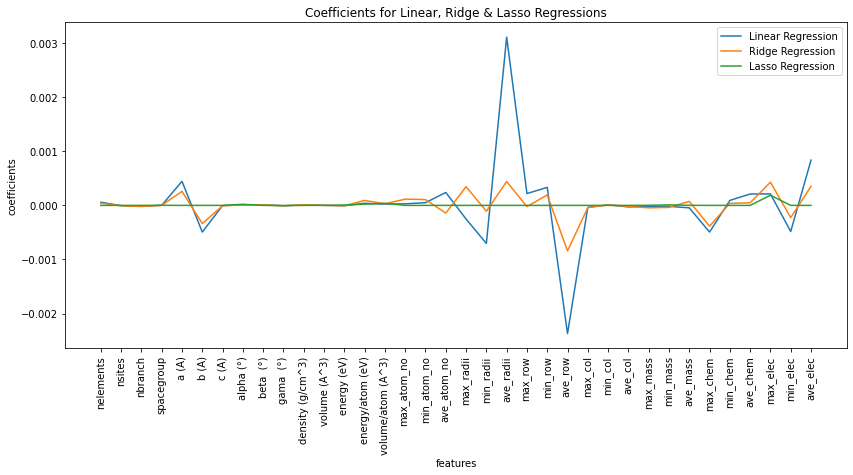

In [84]:
y1 = comparing_models['without_regularization']
y2 = comparing_models['Ridge']
y3 = comparing_models['Lasso']

xx = np.arange(1, 37, 1)
xx

plt.figure(figsize=(14, 6))
plt.plot(xx, y1, label="Linear Regression")
plt.plot(xx, y2, label="Ridge Regression")
plt.plot(xx, y3, label="Lasso Regression")

plt.xticks(xx, X.columns, rotation=90)
#plt.vlines(xx, 0, y1, linestyle="dashed")

#plt.axhline(0, color='r', linestyle='solid')
plt.title("Coefficients for Linear, Ridge & Lasso Regressions")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.legend()
plt.show()

In [ ]:
# print('-----------------------------------------')
# print ('rmse (unscaled):')

# lr = LinearRegression().fit(X_train, y_train)
# rmse, lr_name = get_scores(lr, X_test, y_test)
# d['lr'] = [rmse]
# print (rmse, '(' + lr_name + ')')

# ridge = Ridge(random_state=0).fit(X_train, y_train)
# rmse, ridge_name = get_scores(ridge, X_test, y_test)
# d['ridge'] = [rmse]
# print (rmse, '(' + ridge_name + ')')

# lasso = Lasso(random_state=0).fit(X_train, y_train)
# rmse, lasso_name = get_scores(lasso, X_test, y_test)
# d['lasso'] = [rmse]
# print (rmse, '(' + lasso_name + ')')

# en = ElasticNet(random_state=0).fit(X_train, y_train)
# rmse, en_name = get_scores(en, X_test, y_test)
# d['en'] = [rmse]
# print (rmse, '(' + en_name + ')')

# print('-----------------------------------------')

In [ ]:
# scaler = StandardScaler()
# X_train_std = scaler.fit_transform(X_train)
# X_test_std = scaler.fit_transform(X_test)

# print ('rmse scaled:')
# lr_std = LinearRegression().fit(X_train_std, y_train)
# rmse, lr_std_name = get_scores(lr_std, X_test_std, y_test)
# print (rmse, '(' + lr_std_name + ')')

# rr_std = Ridge(random_state=0).fit(X_train_std, y_train)
# rmse, rr_std_name = get_scores(rr_std, X_test_std, y_test)
# print (rmse, '(' + rr_std_name + ')')

# lasso_std = Lasso(random_state=0).fit(X_train_std, y_train)
# rmse, lasso_std_name = get_scores(lasso_std, X_test_std, y_test)
# print (rmse, '(' + lasso_std_name + ')')

# en_std = ElasticNet(random_state=0).fit(X_train_std, y_train)
# rmse, en_std_name = get_scores(en_std, X_test_std, y_test)
# print (rmse, '(' + en_std_name + ')')